# ExoTransmit

The `ExoCTK.pal.exotransmit` package provides a tool for generating transmission spectra to study  
exoplanet atmospheres.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from ExoCTK.pal import exotransmit

ExoTransmit calculates the transmission spectrum of an exoplanet atmosphere given specified 
input information about the planetary and stellar radii, the planet's surface gravity, the 
atmospheric temperature-pressure (T-P) profile, the location (in terms of pressure) of any
cloud layers, the composition of the atmosphere, and opacity data for the atoms and molecules
that make up the atmosphere.  

The code solves the equation of radiative transfer for absorption of starlight passing 
through the planet's atmosphere as it transits, accounting for the oblique path of light 
through the planetary atmosphere along an Earth-bound observer's line of sight.  The fraction 
of light absorbed (or blocked) by the planet plus its atmosphere is calculated as a function 
of wavelength to produce the wavelength-dependent transmission spectrum.  Funtionality is
provided to simulate the presence of atmospheric aerosols in two ways:  (1) an optically 
thick (gray) cloud deck can be generated at a user-specified height in the atmosphere, and 
(2) the nominal Rayleigh scattering can be increased by a specified factor.

All spectrum generation is done through the `exotransmit.ExoTransmit` object.  The object is instantiated with a set of default parameters.  To generate a transmission spectrum with these parameters simply call the object.

In [2]:
ExoTransmit = exotransmit.ExoTransmit()
wavelength, default_transmission = ExoTransmit()

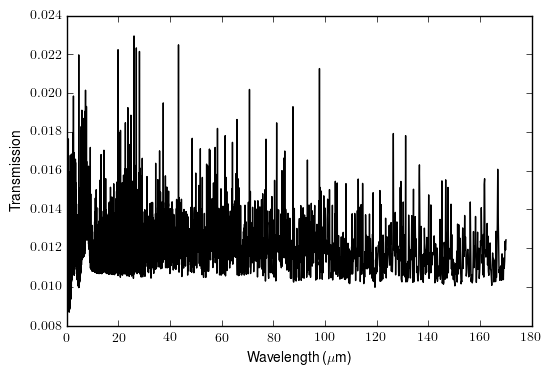

In [3]:
plt.plot(wavelength/1e-6, default_transmission, 'k')
plt.ylabel('Transmission')
plt.xlabel('Wavelength ($\mu$m)')

Printing the  `ExoTransmit` object will display the current parameters in SI units.

In [4]:
print(ExoTransmit)

tpfname = /Users/jfilippazzo/miniconda3/envs/astroconda/lib/python3.5/site-packages/ExoCTK-0.0.dev493-py3.5-macosx-10.6-x86_64.egg/ExoCTK/pal/data/T_P/t_p_800K.dat
eosfname = /Users/jfilippazzo/miniconda3/envs/astroconda/lib/python3.5/site-packages/ExoCTK-0.0.dev493-py3.5-macosx-10.6-x86_64.egg/ExoCTK/pal/data/EOS/eos_0p1Xsolar_cond.dat
g = 9.8
R_planet = 6400000.0
R_star = 700000000.0
chemistry = ['CH4', 'CO2', 'CO', 'H2O', 'NH3', 'O2', 'O3', 'C2H2', 'C2H4', 'C2H6', 'H2CO', 'H2S', 'HCl', 'HCN', 'HF', 'MgH', 'N2', 'NO', 'NO2', 'OCS', 'OH', 'PH3', 'SH', 'SiH', 'SiO', 'SO2', 'TiO', 'VO', 'Na', 'K', 'Scattering', 'Collision Induced Absorption']
threshold = 0.0
rayleigh = 1.0


You can access and change any of these parameters and then call the object again to generate a new transmission spectrum.  For example, you can increase the planet surface gravity `g` and ignore Collision Induced Absorption in the calculation .

In [5]:
ExoTransmit.g = 15.0
ExoTransmit.chemistry.remove('Collision Induced Absorption')
print(ExoTransmit)
wavelength, new_transmission = ExoTransmit()

tpfname = /Users/jfilippazzo/miniconda3/envs/astroconda/lib/python3.5/site-packages/ExoCTK-0.0.dev493-py3.5-macosx-10.6-x86_64.egg/ExoCTK/pal/data/T_P/t_p_800K.dat
eosfname = /Users/jfilippazzo/miniconda3/envs/astroconda/lib/python3.5/site-packages/ExoCTK-0.0.dev493-py3.5-macosx-10.6-x86_64.egg/ExoCTK/pal/data/EOS/eos_0p1Xsolar_cond.dat
g = 15.0
R_planet = 6400000.0
R_star = 700000000.0
chemistry = ['CH4', 'CO2', 'CO', 'H2O', 'NH3', 'O2', 'O3', 'C2H2', 'C2H4', 'C2H6', 'H2CO', 'H2S', 'HCl', 'HCN', 'HF', 'MgH', 'N2', 'NO', 'NO2', 'OCS', 'OH', 'PH3', 'SH', 'SiH', 'SiO', 'SO2', 'TiO', 'VO', 'Na', 'K', 'Scattering']
threshold = 0.0
rayleigh = 1.0


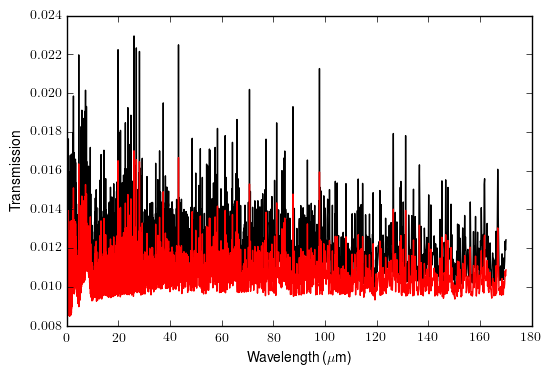

In [6]:
plt.plot(wavelength/1e-6, default_transmission, 'k')
plt.plot(wavelength/1e-6, new_transmission, 'r')
plt.ylabel('Transmission')
plt.xlabel('Wavelength ($\mu$m)')

There are two filename parameters `tpfname` and `eosfname`.  

`tpfname` gives the Temperature-Pressure profile.  The `ExoTransmit` package contains a number of temperature-pressure (T-P) profile files, allowing the user to specify the vertical temperature structure of the atmosphere.  These files are contained in the `T_P/` subdirectory of the `ExoCTK.pal` `data/` directory.  Most of the T-P profiles that are provided  with the code are for isothermal atmospheres with a single temperature expressed as a function of pressure.  Note that transmission spectra are not highly sensitive to temperature gradients in an exoplanet atmosphere (i.e. temperature inversions vs. isothermal vs. decreasing temperature as a function or altitude).  Transmission spectra do however carry a sensitivity to the absolute atmospheric temperature, which is seen in both the scale height dependence of the depth of spectral features and the temperature-dependence of atmospheric composition and absorption cross-sections.

`eosfname` is the Equation of State chemistry file. There are many chemistry files that are included in the package  in the `EOS/` subdirectory of `ExoCTK.pal` `data/` directory.

- eos_0p1Xsolar_cond.dat               
    - equilibrium chemistry file with metalicity = 0.1 times solar 
    - condensation and removal via rainoutof molecules out of the gas phase is included 
    - doesnot include condensation and rainout of graphite
- eos_0p1Xsolar_gas.dat
    - equilibrium chemistry file with metalicity = 0.1 times solar 
    - only gas phase chemistry is accounted for
- eos_1000Xsolar_cond.dat               
- eos_1000Xsolar_cond_graphite.dat     
    - equilibrium chemistry file with metalicity = 1000 times solar 
    - condensation and removal via rainout of molecules out of the gas phase (including graphite) is included 
- eos_1000Xsolar_gas.dat               
    - (Same file-naming convention as above) 
- eos_100Xsolar_cond.dat 
- eos_100Xsolar_cond_graphite.dat
- eos_100Xsolar_gas.dat                 
- eos_10Xsolar_cond.dat                 
- eos_10Xsolar_cond_graphite.dat        
- eos_10Xsolar_gas.dat                  
- eos_1Xsolar_cond.dat                  
- eos_1Xsolar_gas.dat                   
- eos_30Xsolar_cond.dat                 
- eos_30Xsolar_cond_graphite.dat        
- eos_30Xsolar_gas.dat                  
- eos_50Xsolar_cond.dat                 
- eos_50Xsolar_cond_graphite.dat        
- eos_50Xsolar_gas.dat                  
- eos_5Xsolar_cond.dat                  
- eos_5Xsolar_cond_graphite.dat         
- eos_5Xsolar_gas.dat                   
- eos_C2H2.dat			     
    - chemistry file for an atmosphere made of 100% C2H2
- eos_C2H4.dat                         
    - chemistry file for an atmosphere made of 100% C2H4 
- eos_C2H6.dat                         
    - chemistry file for an atmosphere made of 100% C2H6 
- eos_CH4.dat                          
    - chemistry file for an atmosphere made of 100% CH4 
- eos_CO.dat                           
    - (Same file-naming convention as above) 
- eos_CO2.dat                              
- eos_H2CO.dat                            
- eos_H2O.dat                           
- eos_H2S.dat                           
- eos_HCN.dat                           
- eos_HCl.dat			   
- eos_HF.dat			   
- eos_MgH.dat			   
- eos_N2.dat			   
- eos_NH3.dat			   
- eos_NO.dat			   
- eos_NO2.dat			   
- eos_O2.dat			   
- eos_O3.dat			   
- eos_OCS.dat			   
- eos_OH.dat			   
- eos_PH3.dat			   
- eos_SH.dat			   
- eos_SO2.dat			   
- eos_SiH.dat			   
- eos_SiO.dat			   
- eos_TiO.dat			   
- eos_VO.dat			   
- eos_solar_0p2_CtoO_cond.dat	     
    - equilibrium chemistry file for solar metalicity and a C:O ratio of 0.2
    - condensation and removal via rainout of molecules out of the gas phase is included
    - does not include condensation and rainout of graphite
- eos_solar_0p2_CtoO_gas.dat	    
    - equilibrium chemistry file for solar metalicity and a C:O ratio of 0.2 
    - only gas phase chemistry is accounted for 					
- eos_solar_0p4_CtoO_cond.dat	   
- eos_solar_0p4_CtoO_gas.dat	   
- eos_solar_0p6_CtoO_cond.dat	   
- eos_solar_0p6_CtoO_gas.dat	   
- eos_solar_0p8_CtoO_cond.dat	   
- eos_solar_0p8_CtoO_gas.dat	   
- eos_solar_1p0_CtoO_cond.dat	   
- eos_solar_1p0_CtoO_cond_graphite.dat 
    - equilibrium chemistry file for solar metalicity and a C:O ratio of 1.0
    - condensation and removal via rainout of molecules out of the gas phase (including graphite) is included 
- eos_solar_1p0_CtoO_gas.dat	   
- eos_solar_1p2_CtoO_cond.dat	   
- eos_solar_1p2_CtoO_cond_graphite.dat 
- eos_solar_1p2_CtoO_gas.dat           

You can see the full paths of the options for `tpfname` or `eosfname` with following

In [7]:
import os
import ExoCTK

data_dir = os.path.join(os.path.dirname(ExoCTK.pal.__file__), 'data')
print(data_dir)
print('T_P/')
for f in os.listdir(os.path.join(data_dir, 'T_P')):
    print('\t'+f)
print('EOS/')
for f in os.listdir(os.path.join(data_dir, 'EOS')):
    print('\t'+f)


/Users/jfilippazzo/miniconda3/envs/astroconda/lib/python3.5/site-packages/ExoCTK-0.0.dev493-py3.5-macosx-10.6-x86_64.egg/ExoCTK/pal/data
T_P/
	t_p_1000K.dat
	t_p_1100K.dat
	t_p_1200K.dat
	t_p_1300K.dat
	t_p_1400K.dat
	t_p_1500K.dat
	t_p_300K.dat
	t_p_400K.dat
	t_p_500K.dat
	t_p_600K.dat
	t_p_700K.dat
	t_p_800K.dat
	t_p_900K.dat
EOS/
	eos_0p1Xsolar_cond.dat
	eos_0p1Xsolar_gas.dat
	eos_1000Xsolar_cond.dat
	eos_1000Xsolar_cond_graphite.dat
	eos_1000Xsolar_gas.dat
	eos_100Xsolar_cond.dat
	eos_100Xsolar_cond_graphite.dat
	eos_100Xsolar_gas.dat
	eos_10Xsolar_cond.dat
	eos_10Xsolar_cond_graphite.dat
	eos_10Xsolar_gas.dat
	eos_1Xsolar_cond.dat
	eos_1Xsolar_gas.dat
	eos_30Xsolar_cond.dat
	eos_30Xsolar_cond_graphite.dat
	eos_30Xsolar_gas.dat
	eos_50Xsolar_cond.dat
	eos_50Xsolar_cond_graphite.dat
	eos_50Xsolar_gas.dat
	eos_5Xsolar_cond.dat
	eos_5Xsolar_cond_graphite.dat
	eos_5Xsolar_gas.dat
	eos_C2H2.dat
	eos_C2H4.dat
	eos_C2H6.dat
	eos_CH4.dat
	eos_CO.dat
	eos_CO2.dat
	eos_H2CO.dat
	eos_H2O.dat
